In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

# ABOUT THIS DATA (monthly solar cycles)

- ssn: mean monthly S.I.D.C. sunspot number
- smoothed_ssn: smoothed S.I.D.C. sunspot number
- observed_swpc_ssn: mean monthly SWPC/SWO sunspot number
- smoothed_swpc_ssn: smoothed SWPC/SWO sunspot number
- f10.7: mean monthly Penticton, B.C. 10.7cm radio flux values (sfu)
- smoothed_f10.7: smoothed 10.7cm radio flux values (sfu)

Access the dataset : https://www.swpc.noaa.gov/products/solar-cycle-progression

In [3]:
# Load the PAST monthly solar cycles JSON data
with open('../data/monthly_solar_cycle_indices.json') as f:
    data = json.load(f)

# convert to dataframe
solar_cycle = pd.DataFrame(data)

# snake_case columns
solar_cycle.columns = ['time_tag', 'ssn', 'smoothed_ssn', 'observed_swpc_ssn', 'smoothed_swpc_ssn', 'f10.7', 'smoothed_f10.7']

solar_cycle['time_tag'] = pd.to_datetime(solar_cycle['time_tag'])


# ABOUT THIS DATA (NOAA prediction)

The forecast comes from the Solar Cycle Prediction Panel representing NOAA, NASA and the International Space Environmental Services (ISES) which was convened in 2019. 
This amounts to the official forecast for the solar cycle 25. After an open solicitation, the Panel received nearly 50 distinct forecasts for Solar Cycle 25 
from the scientific community. Prediction methods include a variety of physical models, precursor methods, statistical inference, machine learning, 
and other techniques. The prediction released by the panel is a synthesis of these community contributions.
The Prediction Panel predicted Cycle 25 to reach a maximum of 115 occurring in July, 2025. The error bars on this prediction mean the panel expects the 
cycle maximum could be between 105-125 with the peak occurring between November 2024 and March 2026.

Access the prediction method :
https://testbed.swpc.noaa.gov/products/solar-cycle-progression-updated-prediction-experimental

In [4]:
# Load the monthly solar cycles JSON that will serve as a referential comparison with my prediction models
with open('../data/noaa_predicted_solar_cycle.json') as f:
    data2 = json.load(f)

# convert to dataframe
noaa_prediction = pd.DataFrame(data2)

# snake_case columns
noaa_prediction.columns = ['time_tag', 'predicted_ssn', 'high_ssn', 'low_ssn', 'predicted_f10.7', 'high_f10.7', 'low_f10.7']

noaa_prediction['time_tag'] = pd.to_datetime(noaa_prediction['time_tag'])


In [5]:
solar_cycle.head()

,time_tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
0,1749-01-01,96.7,-1.0,-1.0,-1.0,-1.0,-1.0
1,1749-02-01,104.3,-1.0,-1.0,-1.0,-1.0,-1.0
2,1749-03-01,116.7,-1.0,-1.0,-1.0,-1.0,-1.0
3,1749-04-01,92.8,-1.0,-1.0,-1.0,-1.0,-1.0
4,1749-05-01,141.7,-1.0,-1.0,-1.0,-1.0,-1.0


In [6]:

noaa_prediction.head()


,time_tag,predicted_ssn,high_ssn,low_ssn,predicted_f10.7,high_f10.7,low_f10.7
0,2023-07-01,123.2,124.2,122.2,157.4,158.4,156.4
1,2023-08-01,120.6,122.6,118.6,152.9,153.9,151.9
2,2023-09-01,119.0,122.0,116.0,149.5,151.5,147.5
3,2023-10-01,118.2,123.2,113.2,147.3,150.3,144.3
4,2023-11-01,116.9,121.9,111.9,145.2,149.2,141.2


# Converting X-ray flux values to W m^(-2) Hz^(-1) to classify mean monthly flare

In [7]:

# Conversion factor from sfu to W m^(-2) Hz^(-1)
# conversion_factor = 1e-22

# Step 1: Convert X-ray flux values to W m^(-2) Hz^(-1)
#solar_cycle['xray_flux_watt'] = solar_cycle['f10.7'] * conversion_factor


# Step 2: Categorize X-ray flux values into main classes (TO KEEP FOR FINAL STEP)
# def categorize_xray_flux_main_class(flux_value):
#     # Define the main class thresholds for classification
#     if flux_value < 1e-7:
#         return 'A'
#     elif flux_value < 1e-6:
#         return 'B'
#     elif flux_value < 1e-5:
#         return 'C'
#     elif flux_value < 1e-4:
#         return 'M'
#     else:
#         return 'X'

#solar_cycle['mean_monthly_class'] = solar_cycle['xray_flux_watt'].apply(categorize_xray_flux_main_class)

# -------------------------------------
#display(solar_cycle)
#solar_cycle['mean_monthly_class'].value_counts()

# Checking datasets distributions

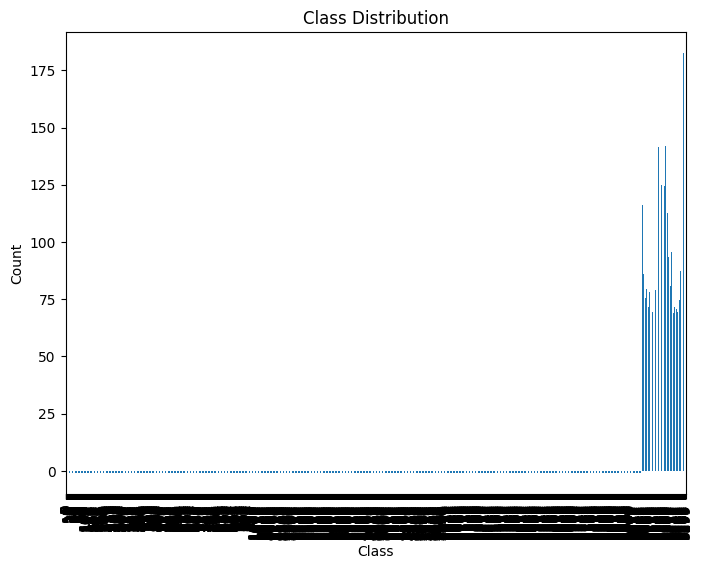

In [8]:
# check class imbalance
target_counts = solar_cycle['f10.7']#.value_counts()
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [9]:
import pandas as pd
import plotly.express as px


solar_cycle['time_tag'] = pd.to_datetime(solar_cycle['time_tag'])

# Sort the DataFrame by 'time_tag' for a chronological plot
solar_cycle_sorted = solar_cycle.sort_values(by='time_tag')

# Create the plot using Plotly
fig = px.line(solar_cycle_sorted, x='time_tag', y='ssn', title='Changes in SSN Over Time (1749-01 to 2023-12)')
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='SSN')
fig.update_layout(xaxis=dict(tickangle=-45), showlegend=True)

# Enable zoom and pan functionality
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True,  # Enable the rangeslider
        ),
        type="date"  # Use a date-type x-axis
    )
)

# Show the plot
fig.show()


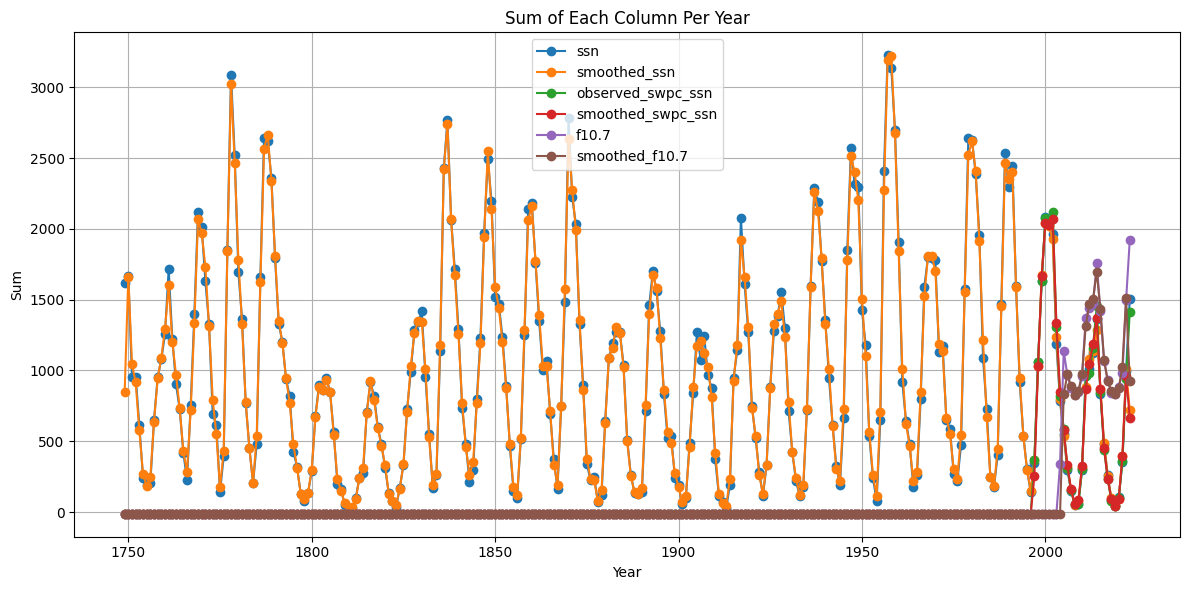

In [10]:
# Convert 'time_tag' column to datetime if it's not already
solar_cycle['time_tag'] = pd.to_datetime(solar_cycle['time_tag'])

# Extract the year from the 'time_tag' column and create a new 'year' column
solar_cycle['year'] = solar_cycle['time_tag'].dt.year

# Group the data by year and calculate the sum for each group
yearly_sum = solar_cycle.groupby('year').agg({
    'ssn': 'sum',
    'smoothed_ssn': 'sum',
    'observed_swpc_ssn': 'sum',
    'smoothed_swpc_ssn': 'sum',
    'f10.7': 'sum',
    'smoothed_f10.7': 'sum'
}).reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each column (excluding the 'year' column)
columns_to_plot = yearly_sum.columns[1:]  
for column in columns_to_plot:
    plt.plot(yearly_sum['year'], yearly_sum[column], marker='o', label=column)

plt.title('Sum of Each Column Per Year')
plt.xlabel('Year')
plt.ylabel('Sum')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
import pandas as pd
import plotly.express as px



# Convert 'time_tag' column to datetime if it's not already
solar_cycle['time_tag'] = pd.to_datetime(solar_cycle['time_tag'])

# Extract the year from the 'time_tag' column and create a new 'year' column
solar_cycle['year'] = solar_cycle['time_tag'].dt.year

# Filter out rows with 'ssn', 'smoothed_ssn', or 'observed_swpc_ssn' values equal to -1 or 0
solar_cycle_filtered = solar_cycle[(solar_cycle['ssn'] != -1) & (solar_cycle['ssn'] != 0) &
                                   (solar_cycle['smoothed_ssn'] != -1) & (solar_cycle['smoothed_ssn'] != 0) &
                                   (solar_cycle['observed_swpc_ssn'] != -1) & (solar_cycle['observed_swpc_ssn'] != 0)]

# Group the filtered data by year and calculate the sum for each group
yearly_sum = solar_cycle_filtered.groupby('year').agg({
    'ssn': 'sum',
    'smoothed_ssn': 'sum',
    'observed_swpc_ssn': 'sum',
    'smoothed_swpc_ssn': 'sum',
    'f10.7': 'sum',
    'smoothed_f10.7': 'sum'
}).reset_index()

# Create the Plotly figure
fig = px.line(yearly_sum, x='year', title='Sum of Each Column Per Year')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Sum')

# Plot each column (excluding the 'year' column)
columns_to_plot = yearly_sum.columns[1:]  # Exclude the 'year' column
for column in columns_to_plot:
    fig.add_scatter(x=yearly_sum['year'], y=yearly_sum[column], mode='lines+markers', name=column)

# Show the plot
fig.show()


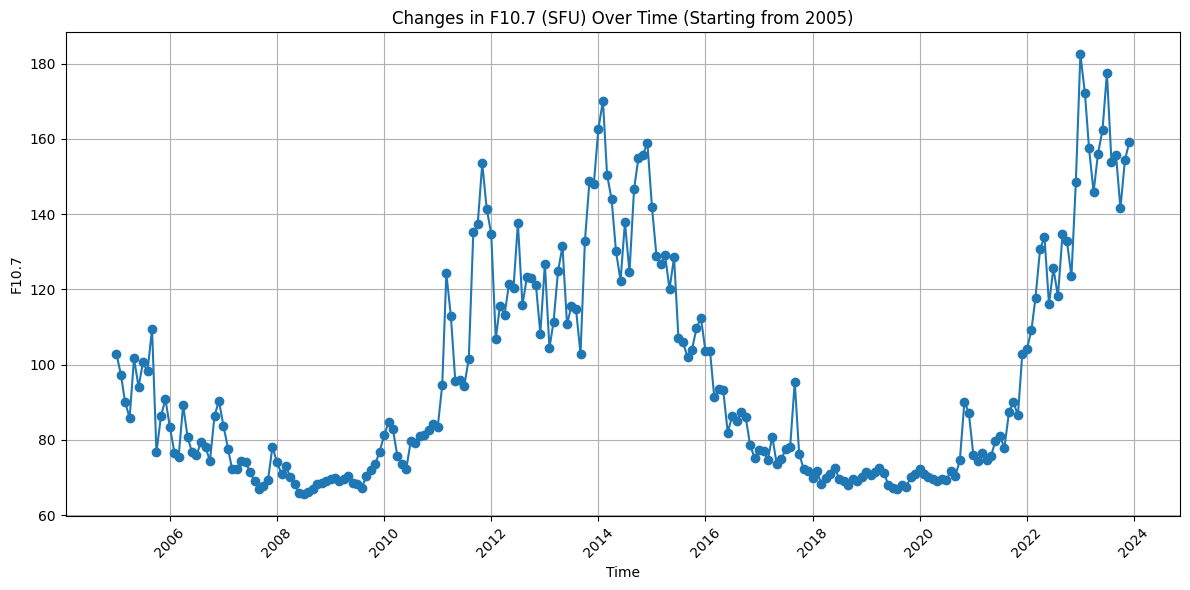

In [13]:
# Convert 'time_tag' column to datetime if it's not already
solar_cycle['time_tag'] = pd.to_datetime(solar_cycle['time_tag'])

# Filter the DataFrame to include data from 1990 onwards
solar_cycle = solar_cycle[solar_cycle['time_tag'] >= '2005-01-01']

# Sort the DataFrame by 'time_tag' for a chronological plot
solar_cycle = solar_cycle.sort_values(by='time_tag')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(solar_cycle['time_tag'], solar_cycle['f10.7'], marker='o', linestyle='-')
plt.title('Changes in F10.7 (SFU) Over Time (Starting from 2005)')
plt.xlabel('Time')
plt.ylabel('F10.7')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# saving both datasets as CSV to be used in ML models for prediction

In [14]:
# droping columns that might induce multi-collinearity
columns_to_drop = ['smoothed_ssn', 'observed_swpc_ssn', 'smoothed_swpc_ssn', 'smoothed_f10.7']
solar_cycle = solar_cycle.drop(columns=columns_to_drop)

#Save as CSV
solar_cycle.to_csv('../data/solar_cycle_classified.csv', index=False)
noaa_prediction.to_csv('../data/noaa_prediction.csv', index=False)
